In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#enesemble
from sklearn.ensemble import RandomForestClassifier
#NAive bais
from sklearn.naive_bayes import GaussianNB
#tree
from sklearn.svm import SVC
# linear 
from sklearn.linear_model import LogisticRegression
# tree 
from sklearn.tree import DecisionTreeClassifier
# K
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.metrics import confusion_matrix ,classification_report ,ConfusionMatrixDisplay ,accuracy_score

In [36]:
df=pd.read_csv('/Users/ayush/Desktop/AI& ML digipodium/dry-bean dataset/Dry_bean.csv')

In [37]:
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [39]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
y=enc.fit_transform(df['Class'])

In [40]:
X=df.drop('Class',axis=1)


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest ,chi2

#! logistic reg
k=10
clf1=Pipeline(
    [
        ('feature ',SelectKBest (chi2,k=k)),
        ('classfication',LogisticRegression(solver='saga'))
    ]
)
clf1

Pipeline(steps=[('feature ',
                 SelectKBest(score_func=<function chi2 at 0x17614bd00>)),
                ('classfication', LogisticRegression(solver='saga'))])

In [42]:
clf2=Pipeline(
    [
        ('feature ',SelectKBest (chi2,k=k)),
        ('classfication',DecisionTreeClassifier())
    ]
)
clf2

Pipeline(steps=[('feature ',
                 SelectKBest(score_func=<function chi2 at 0x17614bd00>)),
                ('classfication', DecisionTreeClassifier())])

In [43]:
clf3=Pipeline(
    [
        ('feature ',SelectKBest (chi2,k=k)),
        ('classfication',KNeighborsClassifier())
    ]
)
clf3

Pipeline(steps=[('feature ',
                 SelectKBest(score_func=<function chi2 at 0x17614bd00>)),
                ('classfication', KNeighborsClassifier())])

In [44]:
clf4=Pipeline(
    [
        ('feature ',SelectKBest (chi2,k=k)),
        ('classfication',GaussianNB())
    ]
)
clf4

Pipeline(steps=[('feature ',
                 SelectKBest(score_func=<function chi2 at 0x17614bd00>)),
                ('classfication', GaussianNB())])

In [45]:
clf5=Pipeline(
    [
        ('feature ',SelectKBest (chi2,k=k)),
        ('classfication',SVC())
    ]
)
clf5

Pipeline(steps=[('feature ',
                 SelectKBest(score_func=<function chi2 at 0x17614bd00>)),
                ('classfication', SVC())])

In [46]:
clf6=Pipeline(
    [
        ('feature ',SelectKBest (chi2,k=k)),
        ('classfication',RandomForestClassifier())
    ]
)
clf6

Pipeline(steps=[('feature ',
                 SelectKBest(score_func=<function chi2 at 0x17614bd00>)),
                ('classfication', RandomForestClassifier())])

In [47]:
#split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
#train the model
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
clf3.fit(X_train,y_train)
clf4.fit(X_train,y_train)
clf5.fit(X_train,y_train)
clf6.fit(X_train,y_train)

/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('feature ',
                 SelectKBest(score_func=<function chi2 at 0x17614bd00>)),
                ('classfication', RandomForestClassifier())])

In [49]:
ypred1=clf1.predict(X_test)
ypred2=clf2.predict(X_test)
ypred3=clf3.predict(X_test)
ypred4=clf4.predict(X_test)
ypred5=clf5.predict(X_test)
ypred6=clf6.predict(X_test)

In [50]:
acc1=accuracy_score( y_test,ypred1)
acc2=accuracy_score(y_test, ypred2)
acc3=accuracy_score(y_test ,ypred3)
acc4=accuracy_score(y_test ,ypred4)
acc5=accuracy_score(y_test ,ypred5)
acc6=accuracy_score(y_test ,ypred6)

In [51]:
print(f' acc1 {acc1} \n acc6  {acc6}\n acc2 {acc2} \n acc3 {acc3} \n acc4 {acc4} \n acc5 {acc5} ')

 acc1 0.3250091810503122 
 acc6  0.9063532868160118
 acc2 0.87146529562982 
 acc3 0.7194271024605214 
 acc4 0.7579875137715755 
 acc5 0.6305545354388542 


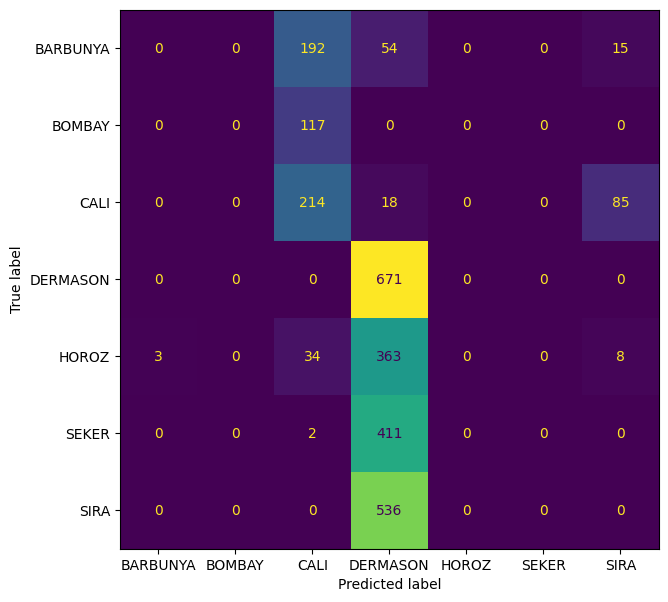

In [52]:
fig,ax=plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay(
    confusion_matrix(y_test,ypred1),
    display_labels=enc.classes_

).plot(ax=ax,colorbar=False)

In [53]:
print(classification_report(y_test,ypred1,target_names=enc.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       261
      BOMBAY       0.00      0.00      0.00       117
        CALI       0.38      0.68      0.49       317
    DERMASON       0.33      1.00      0.49       671
       HOROZ       0.00      0.00      0.00       408
       SEKER       0.00      0.00      0.00       413
        SIRA       0.00      0.00      0.00       536

    accuracy                           0.33      2723
   macro avg       0.10      0.24      0.14      2723
weighted avg       0.13      0.33      0.18      2723



/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ayush/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


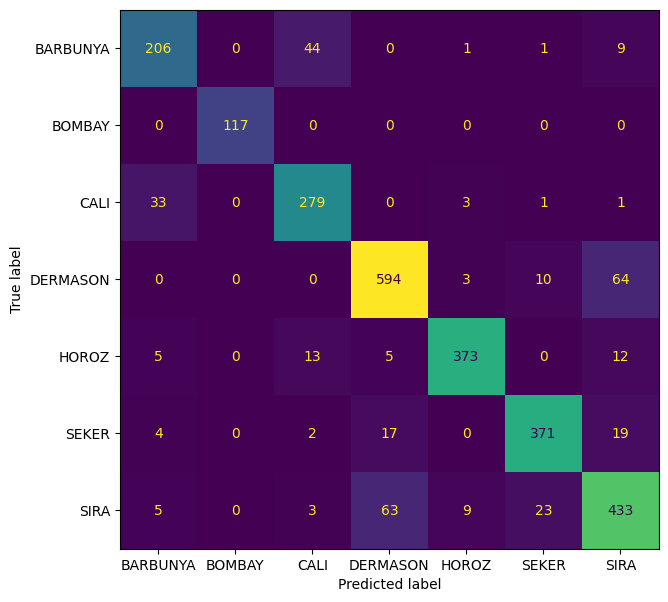

In [54]:
fig,ax=plt.subplots(figsize=(7,7))
ConfusionMatrixDisplay(
    confusion_matrix(y_test,ypred2),
    display_labels=enc.classes_

).plot(ax=ax,colorbar=False)

In [55]:
print(classification_report(y_test,ypred2,target_names=enc.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.81      0.79      0.80       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.82      0.88      0.85       317
    DERMASON       0.87      0.89      0.88       671
       HOROZ       0.96      0.91      0.94       408
       SEKER       0.91      0.90      0.91       413
        SIRA       0.80      0.81      0.81       536

    accuracy                           0.87      2723
   macro avg       0.88      0.88      0.88      2723
weighted avg       0.87      0.87      0.87      2723



In [70]:
# save the model, encoder
import joblib
joblib.dump(clf6, 'saved_model.pkl')
joblib.dump(enc, 'saved_encoder.pkl')


['saved_encoder.pkl']

In [71]:
def predict_input(
    area, perimeter, majoraxislength,
    minoraxislength, aspectration, eccentricity,
    convexarea, equivdiameter, extent, solidity, 
    roundness, compactness, shapefactor1,
    shapefactor2, shapefactor3, shapefactor4
):
    data = {'Area': area,
        'Perimeter': perimeter,
        'MajorAxisLength': majoraxislength,
        'MinorAxisLength': minoraxislength,
        'AspectRation': aspectration,
        'Eccentricity': eccentricity,
        'ConvexArea': convexarea,
        'EquivDiameter': equivdiameter,
        'Extent': extent,
        'Solidity': solidity,
        'roundness': roundness,
        'Compactness': compactness,
        'ShapeFactor1': shapefactor1,
        'ShapeFactor2': shapefactor2,
        'ShapeFactor3':shapefactor3,
        'ShapeFactor4': shapefactor4
    }
    X_inp = pd.DataFrame([data])            # create a dataframe
    clf = joblib.load('saved_model.pkl')    # load the model
    enc = joblib.load('saved_encoder.pkl')  # load the encoder
    y_pred = clf.predict(X_inp)             # predict the class
    # print(y_pred, enc.inverse_transform(y_pred)[0])
    return enc.inverse_transform(y_pred)[0] # bean class name

In [72]:
# test the function X.iloc[0].todict()
data = {'Area': 28395.0,
 'Perimeter': 1000.291,
 'MajorAxisLength': 608.1781167,
 'MinorAxisLength': 173.888747,
 'AspectRation': 1.197191424,
 'Eccentricity': 0.549812187,
 'ConvexArea': 28715.0,
 'EquivDiameter': 190.1410973,
 'Extent': 0.763922518,
 'Solidity': 0.988855999,
 'roundness': 0.858027126,
 'Compactness': 0.913357755,
 'ShapeFactor1': 0.007331506,
 'ShapeFactor2': 0.003147289,
 'ShapeFactor3': 0.834222388,
 'ShapeFactor4': 0.998723889
}
predict_input(data) # 'DERMASON'

TypeError: predict_input() missing 15 required positional arguments: 'perimeter', 'majoraxislength', 'minoraxislength', 'aspectration', 'eccentricity', 'convexarea', 'equivdiameter', 'extent', 'solidity', 'roundness', 'compactness', 'shapefactor1', 'shapefactor2', 'shapefactor3', and 'shapefactor4'

In [ ]:
# principe analysis
# all types of eleminiation

In [73]:
import gradio as gr
import joblib

In [67]:
print(','.join(df.columns.tolist()).lower())

area,perimeter,majoraxislength,minoraxislength,aspectration,eccentricity,convexarea,equivdiameter,extent,solidity,roundness,compactness,shapefactor1,shapefactor2,shapefactor3,shapefactor4,class


In [74]:
ui = gr.Interface(
    predict_input,
    inputs = [
        gr.Number(label='Area'),
        gr.Number(label='Perimeter', step=.01),
        gr.Number(label='MajorAxisLength', step=.01),
        gr.Number(label='MinorAxisLength', step=.01),
        gr.Number(label='AspectRation', step=.01),
        gr.Number(label='Eccentricity', step=.01),
        gr.Number(label='ConvexArea'),
        gr.Number(label='EquivDiameter', step=.01),
        gr.Number(label='Extent', step=.01),
        gr.Number(label='Solidity', step=.01),
        gr.Number(label='roundness', step=.01),
        gr.Number(label='Compactness', step=.01),
        gr.Number(label='ShapeFactor1', step=.01),
        gr.Number(label='ShapeFactor2', step=.01),
        gr.Number(label='ShapeFactor3', step=.01),
        gr.Number(label='ShapeFactor4', step=.01)
    ],
    outputs = 'text',
    title = "Dry Bean Classification",
    examples=df.iloc[:5].values.tolist()
)
ui.launch()

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.
